In [1]:
import numpy as np
from scipy.special import jn
import matplotlib.pyplot as plt

In [2]:
def qkr(T, K, M, DIAG = 10):
    """Quantum kicked rotartor: computes w = <p^2> and psi

    Initial state $p[0] = 1$
    Output:
        w   : the variance of the angular momentum as
              a function of time
        p   : array with the momentum eigenvalues, 
              in the interval (-T,T), integers
        psi : the wavefunction in momentum representation
              array of shape (N=2T, T/DIAG)
    """
    N = 2*T
    p = np.fft.fftfreq(N, 1.0/N)
    x = np.arange(0, 2*np.pi, 2*np.pi/N)
    #
    Up = np.exp(-1j*p**2/(2*M))
    Ux = np.exp(-1j*K*np.cos(x))
    #
    psi = np.zeros((N, T//DIAG + 1), dtype=complex)
    psi_t = np.zeros(N, dtype=complex)
    psi_t[0] = 1
    #
    w = np.zeros(T)
    it = 1
    for t in range(T):
        psi_t = np.fft.fft(Ux * np.fft.ifft(Up * psi_t))
        w[t] = sum(p**2 * abs(psi_t)**2)
        if t%DIAG == 0:
            psi[:,it] = psi_t
            it += 1
    return w, np.fft.fftshift(p), np.fft.fftshift(psi)

def get_floquet_eigenstates(basis_size:int,M:float,K:float):
    """Calculate the matrix elements of the Floquet Operator of QKR in momentum basis"""
    
    floquet_operator = np.zeros((basis_size,basis_size),dtype=complex)
    for index, _ in np.ndenumerate(floquet_operator):
        floquet_operator[index] = np.exp(-1j*pow(index[1]+1,2)/(2*M))*pow(1j,index[1]-index[0])*jn(index[1]-index[0],K)
        
    return np.linalg.eig(floquet_operator)

def plot_floquet_eigenvector(eigenvector:np.ndarray):
    """Plot the given vector in absolute and log scale"""
    
    fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(8,7))

    # Plot absolute value of eigenvector
    axes[0].plot(np.abs(eigenvector),label='$| \psi |$')
    axes[0].set_xlabel('Momentum basis',fontsize=12)
    axes[0].set_ylabel('$\psi(p)$',fontsize=16)
    
    # Plot log of eigenvector
    axes[1].plot(np.log(np.abs(eigenvector)),label='$| \psi |$')
    axes[1].set_xlabel('Momentum basis',fontsize=12)
    axes[1].set_ylabel('$ln(\psi(p))$',fontsize=16)

    plt.suptitle('Floquet Eigenstate',fontsize=18)
    plt.tight_layout()
    
    return fig


# Observing Time Evolution

In [3]:
no_kicks = 2000
w,p,psi_p = qkr(T=no_kicks, K=20, M=8, DIAG = 5)

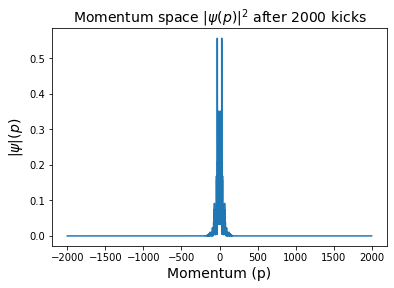

In [4]:
pabs = np.sum(psi_p**2,axis=1)
plt.plot(p,np.abs(pabs))
plt.xlabel('Momentum (p)',fontsize=14)
plt.ylabel('$|\psi|(p)$',fontsize=14)
plt.title('Momentum space $|\psi (p) |^2$ after 2000 kicks',fontsize=14)
plt.show()

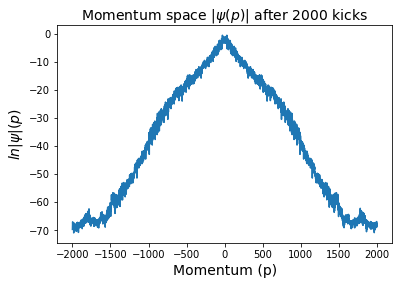

In [5]:
pabs = np.sum(psi_p**2,axis=1)
plt.plot(p,np.log(np.abs(pabs)))
plt.xlabel('Momentum (p)',fontsize=14)
plt.ylabel('$ln|\psi|(p)$',fontsize=14)
plt.title('Momentum space $|\psi (p) |$ after 2000 kicks',fontsize=14)
plt.show()

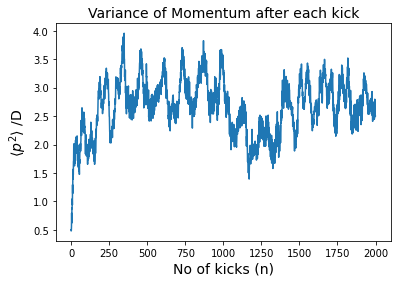

In [6]:
plt.plot(w/400)
plt.title('Variance of Momentum after each kick',fontsize=14)
plt.xlabel('No of kicks (n)',fontsize=14)
plt.ylabel(r'$\langle p^2 \rangle$ /D',fontsize=14)
plt.show()

# Floquet Eigenstates

## Eigenstates of the Floquet Operator
- The Floquet operator for the Quantum kicked rotor is given by : 
$$F = e^{-iK\cos{x}} e^{\frac{-ip^2}{2M}}$$

- Using momentum eigenstates $| n \rangle, | m \rangle$ and the Bessel integral, we obtain the matrix elements of F as : 
$$\langle n | F | m \rangle = e^{\frac{-im^2}{2M}}i^{m-n} J_{m-n}(k)$$

## First we look at the eigenvalues of the Floquet operator

- The eigenvalues of the Floquet operator are called 'Quasi-Energies'
- 'Quasi' because they aren't the eigenvalues of the Hamiltonian but its exponential

In [7]:
f_eval, f_evec = get_floquet_eigenstates(basis_size=512,M=1,K=6)

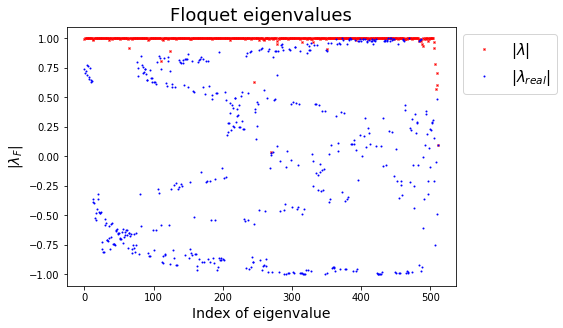

In [8]:
# Plot eigenvalues
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(np.abs(f_eval),'rx', markersize=2, label='$| \lambda |$')
ax.plot(f_eval.real, 'bo',markersize=1, label='$| \lambda_{real} |$')
ax.set_title('Floquet eigenvalues',fontsize=18)
ax.set_ylabel('$| \lambda_{F} |$',fontsize=14)
ax.set_xlabel('Index of eigenvalue',fontsize=14)
plt.legend(prop={'size': 15},bbox_to_anchor=(1, 1))
plt.show()

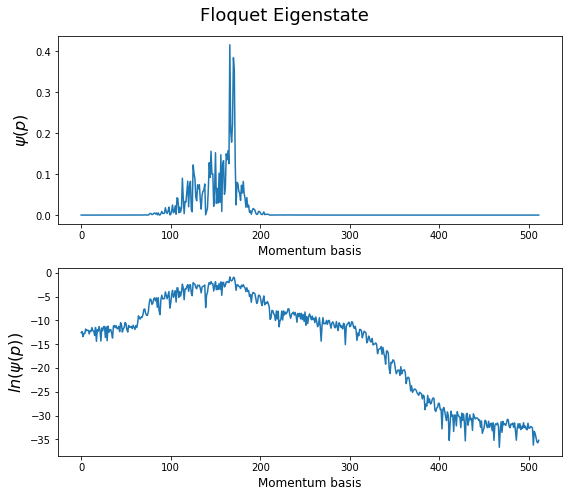

In [9]:
# Plot the 2nd eigenvector
plot_floquet_eigenvector(f_evec[:,2])
plt.show()

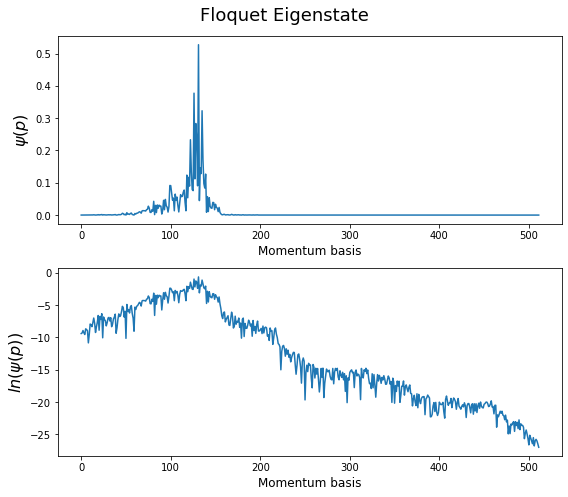

In [10]:
# Plot the 169th eigenvector
plot_floquet_eigenvector(f_evec[:,169])
plt.show()

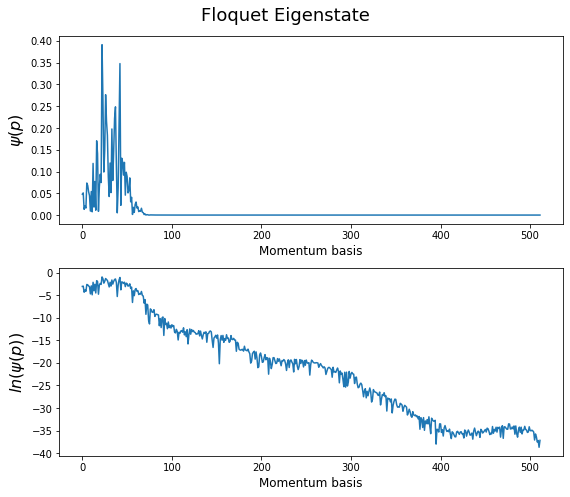

In [11]:
# Plot the 150th eigenvector
plot_floquet_eigenvector(f_evec[:,150])
plt.show()

# References: 

1. https://mathworld.wolfram.com/BesselFunctionoftheFirstKind.html
2. http://www.scholarpedia.org/article/Kicked_top